### Import libraries

In [1]:
# data analysis, splitting and wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Load data

In [2]:
# column names in accordance with feature information
col_names = ['age','sex','chest_pain','blood_pressure','serum_cholestoral','fasting_blood_sugar', 'electrocardiographic',
             'max_heart_rate','induced_angina','ST_depression','slope','no_of_vessels','thal','diagnosis']

# read the file
df = pd.read_csv("processed.cleveland.data", names=col_names, header=None, na_values="?")

print("Number of records: {}\nNumber of variables: {}".format(df.shape[0], df.shape[1]))

# display the first 5 lines
df.head()

Number of records: 303
Number of variables: 14


,age,sex,chest_pain,blood_pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,no_of_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                     303 non-null float64
sex                     303 non-null float64
chest_pain              303 non-null float64
blood_pressure          303 non-null float64
serum_cholestoral       303 non-null float64
fasting_blood_sugar     303 non-null float64
electrocardiographic    303 non-null float64
max_heart_rate          303 non-null float64
induced_angina          303 non-null float64
ST_depression           303 non-null float64
slope                   303 non-null float64
no_of_vessels           299 non-null float64
thal                    301 non-null float64
diagnosis               303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


In [4]:
# extract numeric columns and find categorical ones
numeric_columns = ['serum_cholestoral', 'max_heart_rate', 'age', 'blood_pressure', 'ST_depression']
categorical_columns = [c for c in df.columns if c not in numeric_columns]
print(categorical_columns)

['sex', 'chest_pain', 'fasting_blood_sugar', 'electrocardiographic', 'induced_angina', 'slope', 'no_of_vessels', 'thal', 'diagnosis']


## 2.Analyze features, identify patterns, and explore the data

### Target value

Knowing the distribution of target value is vital for choosing appropriate accuracy metrics and consequently properly assess different machine learning models.

In [6]:
# create a boolean vector and map it with corresponding values (True=1, False=0)
df.diagnosis = (df.diagnosis != 0).astype(int)
df.diagnosis.value_counts()

0    164
1    139
Name: diagnosis, dtype: int64

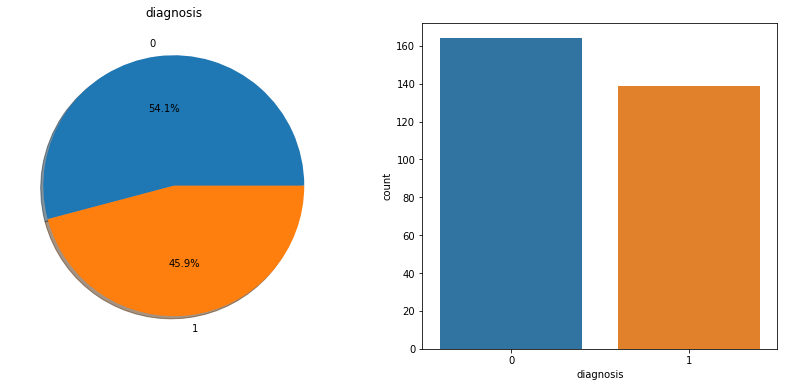

In [7]:
# create two plots side by side
f, ax = plt.subplots(1,2,figsize=(14,6))
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')
sns.countplot('diagnosis', data=df, ax=ax[1])
plt.show()

Now the distribution of target value is almost equal, so using standard metrics in further machine learning modelling like _accuracy_ and _AUC_ is justified. 

### Categorical features

Let's take a closer look at categorical variables and see how they impact our target. 

In [8]:
# count ill vs healthy people grouped by sex
df.groupby(['sex','diagnosis'])['diagnosis'].count()

sex  diagnosis
0.0  0             72
     1             25
1.0  0             92
     1            114
Name: diagnosis, dtype: int64

## 3.Data Preparation

In order to make our dataset compatible with machine learning algorithms contained in Sci-kit Learn library, first of all, we need to handle all missing data.

There are many options we could consider when replacing a missing value, for example:
- A constant value that has meaning within the domain, such as 0, distinct from all other values
- A value from another randomly selected record
- A mean, median or mode value for the column
- A value estimated by another predictive model

In [9]:
# show columns having missing values
df.isnull().sum()

age                     0
sex                     0
chest_pain              0
blood_pressure          0
serum_cholestoral       0
fasting_blood_sugar     0
electrocardiographic    0
max_heart_rate          0
induced_angina          0
ST_depression           0
slope                   0
no_of_vessels           4
thal                    2
diagnosis               0
dtype: int64

Both columns containing missing values are categorical. In such case, mode (most frequently occurring value in a given vector) is usually used for filling 'nans'. Let's follow this solution.

In [10]:
# fill missing values with mode
df['no_of_vessels'].fillna(df['no_of_vessels'].mode()[0], inplace=True)
df['thal'].fillna(df['thal'].mode()[0], inplace=True)

Having clean data, a label can be separated from the data frame. It is also a good moment to split our data train and test sets. I will allocate 30% of the entire data to test set, which is typically considered as a standard split for this size of dataset.

In [11]:
# extract the target variable
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [12]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


Data needs to be normalized or standardized before applying to machine learning algorithms. Standardization scales the data and gives information on how many standard deviations the data is placed from its mean value. Effectively, the mean of the data (µ) is 0 and the standard deviation (σ) is 1.

In [13]:
# scale feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Modelling and predicting with Machine Learning

The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric. I have chosen several algorithms typical for solving supervised learning problems throughout classification methods.

First of all, let's equip ourselves with a handy tool that benefits from the cohesion of SciKit Learn library and formulate a general function for training our models. The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff). 

In [14]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

### K-Nearest Neighbours (KNN)

K-Nearest Neighbors algorithm is a non-parametric method used for classification and regression. The principle behind nearest neighbour methods is to find a predefined number of training samples closest in distance to the new point and predict the label from these.

In [15]:
# KNN
model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier)

Train accuracy: 88.21%
Test accuracy: 86.81%


Despite its simplicity, the result is very promising. Let's see if KNN can perform even better by trying different 'n_neighbours' inputs.

In [16]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 74.73%
n_neigbors = 2
Train accuracy: 87.74%
Test accuracy: 79.12%
n_neigbors = 3
Train accuracy: 90.57%
Test accuracy: 83.52%
n_neigbors = 4
Train accuracy: 87.74%
Test accuracy: 84.62%
n_neigbors = 5
Train accuracy: 88.21%
Test accuracy: 86.81%
n_neigbors = 6
Train accuracy: 85.38%
Test accuracy: 86.81%
n_neigbors = 7
Train accuracy: 87.26%
Test accuracy: 86.81%
n_neigbors = 8
Train accuracy: 85.38%
Test accuracy: 85.71%
n_neigbors = 9
Train accuracy: 86.32%
Test accuracy: 85.71%


It turns out that default value of n_neighbours (5) is optimal. 